In [16]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_iris 
%matplotlib inline

In [17]:
#loading_the_dataset
data =load_iris()

In [18]:
data.data.shape

(150, 4)

In [19]:
data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [20]:
print('features:',data.feature_names)
print('class to predict :',data.target_names)

features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
class to predict : ['setosa' 'versicolor' 'virginica']


In [21]:
x=data.data
y=data.target
print(x.shape, y.shape)
y

(150, 4) (150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
#splitting_data_between_testingandtraining_dataset 
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest=train_test_split(x,y,random_state=50,test_size=0.20)
xtest

array([[5.6, 3. , 4.1, 1.3],
       [6.3, 2.5, 4.9, 1.5],
       [5.4, 3.4, 1.7, 0.2],
       [5.4, 3.9, 1.3, 0.4],
       [6.5, 3. , 5.2, 2. ],
       [6.7, 3.1, 5.6, 2.4],
       [5.7, 2.5, 5. , 2. ],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3. , 1.4, 0.1],
       [6.2, 2.2, 4.5, 1.5],
       [5.1, 3.4, 1.5, 0.2],
       [7.4, 2.8, 6.1, 1.9],
       [4.9, 3.1, 1.5, 0.2],
       [6.8, 3. , 5.5, 2.1],
       [5.7, 2.8, 4.5, 1.3],
       [5. , 3. , 1.6, 0.2],
       [5.8, 2.7, 3.9, 1.2],
       [5.3, 3.7, 1.5, 0.2],
       [5.5, 2.4, 3.7, 1. ],
       [6.7, 3. , 5. , 1.7],
       [6.3, 3.3, 6. , 2.5],
       [5.5, 2.4, 3.8, 1.1],
       [5.8, 4. , 1.2, 0.2],
       [7.9, 3.8, 6.4, 2. ],
       [6.7, 3.1, 4.7, 1.5],
       [7.7, 2.6, 6.9, 2.3],
       [6.3, 3.3, 4.7, 1.6],
       [6.5, 2.8, 4.6, 1.5],
       [6.2, 2.9, 4.3, 1.3],
       [6.8, 3.2, 5.9, 2.3]])

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0,criterion='entropy')
#training_with_train_dataset
dt.fit(xtrain,ytrain)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [24]:
from sklearn.metrics import accuracy_score
#predicting_testing dataset
ypred=dt.predict(xtest)
#accuracy_of_predicted_result_and_actual_result
accuracy_score(ytest,ypred)

0.9666666666666667

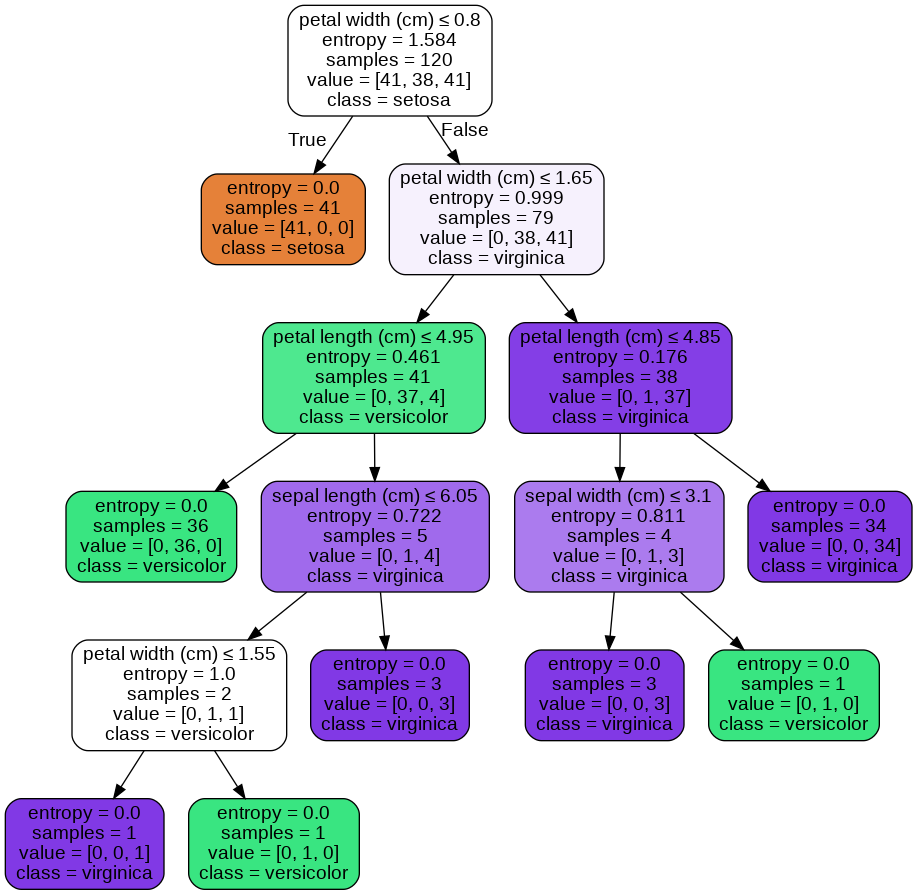

In [25]:
#visualizing_decision_tree  
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image 
import pydotplus
dot_data =StringIO()
export_graphviz(dt,out_file=dot_data,
               filled=True, rounded=True,special_characters=True,
               feature_names= data.feature_names,class_names=data.target_names)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())